# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [12]:
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [33]:
len(df)

156

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

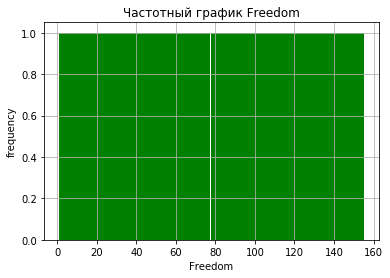

In [43]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], bins=len(df), facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

Частотный график выборки Freedom показывает нам, что она имеет **равномерное распределение**

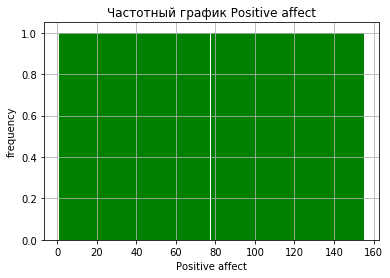

In [44]:
n, bins, patches = plt.hist(df['Positive affect'], bins=len(df), facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect')
plt.grid(True)
plt.show()

Частотный график выборки Positive affect показывает нам, что она имеет **равномерное распределение**

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

*Медиана:*

1ый способ:

In [57]:
# Извлекаем колонку Freedom
freedom = df['Freedom']

# Находим количество данных оценок
num_freedom = len(freedom)

# Сортируем в порядке возрастания
sorted_freedom = sorted(freedom)

# Ищем индекс среднего элемента
# если количество элементов четное, то берем среднее двух элементов в середине
middle = (num_freedom // 2)
if num_freedom%2==0:
  result = (sorted_freedom[middle-1] + sorted_freedom[middle])/2
else:
  result = sorted_freedom[middle]
# Находим медиану
print('Медиана: ', result)

Медиана:  71.0


2й способ:

In [58]:
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  71.0


*Мода:*

In [59]:
# Создаём пустой словарь, в котором будем считать количество появлений значений оценки свободы Freedom
freedom_counts = {}
for p in freedom:
    if p not in Freedom_counts:
        freedom_counts[p] = 1
    else:
        freedom_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxp = 0
mode_freedom = None
for k, v in freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_freedom = k
print('Значение моды:', mode_freedom, 'Количество встречаемости:', maxp)

Значение моды: 5.0 Количество встречаемости: 1


In [60]:
print('Значение моды: ', statistics.mode(freedom))

StatisticsError: no unique mode; found 156 equally common values

Итак, у нас нет значения, которое наиболее часто встречается в выборке, что и логично, поскольку **равномерное распределение моды не имеет**.

*Математическое ожидание:*

In [7]:
statistics.mean(df['Freedom'])

nan

В столбце Freedom есть значения NaN, это наши **выбросы**

In [87]:
df.loc[pd.isnull(df.Freedom), :]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


Уберём их:

In [8]:
freedom_n = df['Freedom'].dropna()

In [9]:
me = sum(freedom_n)/len(freedom_n)
print('Математическое ожидание:', me)

Математическое ожидание: 78.0


In [10]:
statistics.mean(freedom_n)

78.0

*Стандартное отклонение:*

In [14]:
statistics.pstdev(freedom_n)

44.74371464239419

*Дисперсия:*

In [13]:
statistics.pvariance(freedom_n)

2002.0

*Минимум:*

In [15]:
min(freedom_n)

1.0

*Максимум:*

In [19]:
max(freedom_n)

155.0

*Размах:*

In [17]:
freedom_range = max(freedom_n) - min(freedom_n)
print(freedom_range)

154.0


Почему нельзя найти моду?

Потому что у нас все значения встречаются лишь один раз, т.е. мы не можем выбрать наиболее часто встречающийся элемент, мы имеем дело с равномерным распределением, которое моды не имеет.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Графическое отображение корреляции:

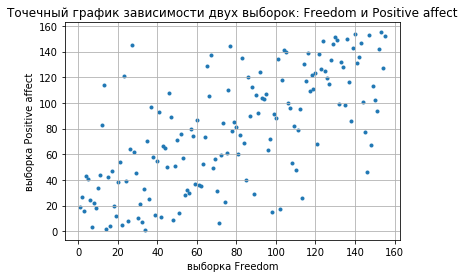

In [23]:
freedom_n = df['Freedom'].dropna()
positive_affect_n = df['Positive affect'].dropna()

plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок: Freedom и Positive affect')
plt.grid(True)
plt.scatter(freedom_n, positive_affect_n, marker='.')

Математическое отображение корреляции:

In [25]:
from scipy.stats.stats import pearsonr
corr, p_value = pearsonr(freedom_n, positive_affect_n)
print(corr)

0.6817698430601657


**Вывод**: линейная корреляция Freedom и Positive affect выражена, но не в достаточной мере (примерно на 70%), т.е. изменение меры пложительных эмоций примерно на 70% соотносится с изменением индекса свободы.

Нормализовать данные колонки Freedom (централизация + масштабирование)

Централизация:

In [28]:
freedom_1 = freedom_n - statistics.mean(freedom_n)
print(statistics.mean(freedom_1))

0.0


Масштабирование:

In [29]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

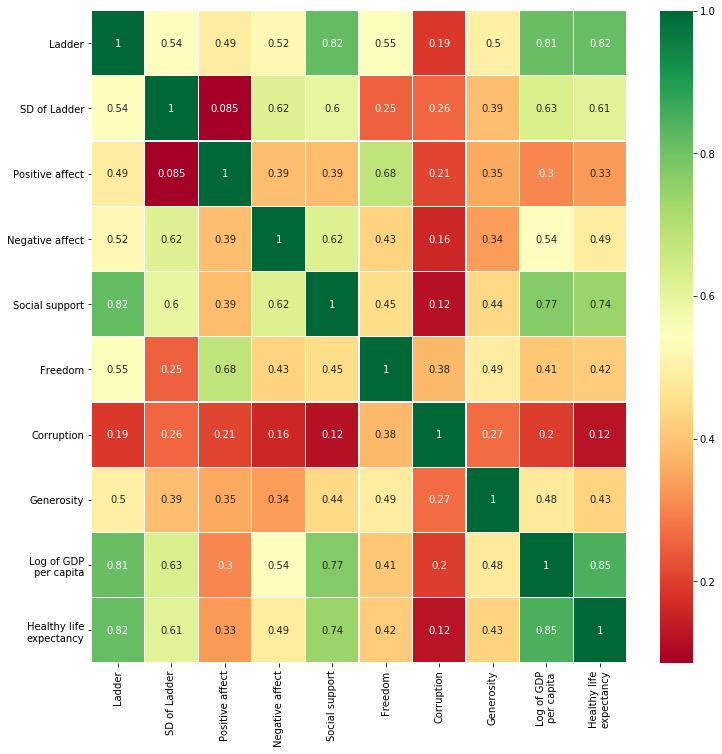

In [30]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [31]:
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

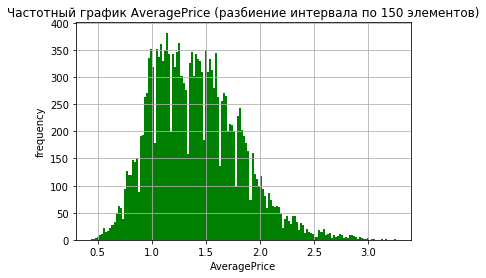

In [34]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['AveragePrice'], 150, facecolor='g')

plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.title('Частотный график AveragePrice (разбиение интервала по 150 элементов)')
plt.grid(True)
plt.show()

Частотный график выборки AveragePrice показывает нам, что она имеет **Гауссовское распределение** (с небольшим смещением влево)

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [35]:
corr, p_value = pearsonr(df['4046'], df['AveragePrice'])
print(corr)

-0.2083170484878848


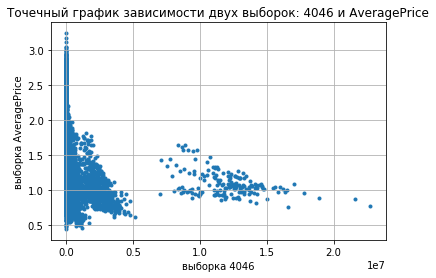

In [40]:


plt.xlabel('выборка 4046')
plt.ylabel('выборка AveragePrice')
plt.title('Точечный график зависимости двух выборок: 4046 и AveragePrice')
plt.grid(True)
plt.scatter(df['4046'], df['AveragePrice'], marker='.')

In [36]:
corr, p_value = pearsonr(df['4225'], df['AveragePrice'])
print(corr)

-0.1729277725093354


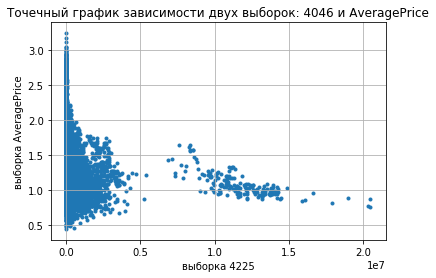

In [42]:
plt.xlabel('выборка 4225')
plt.ylabel('выборка AveragePrice')
plt.title('Точечный график зависимости двух выборок: 4046 и AveragePrice')
plt.grid(True)
plt.scatter(df['4225'], df['AveragePrice'], marker='.')

In [37]:
corr, p_value = pearsonr(df['4770'], df['AveragePrice'])
print(corr)

-0.17944598397975622


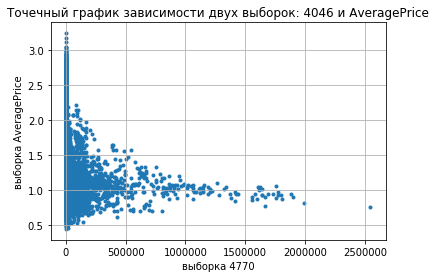

In [43]:
plt.xlabel('выборка 4770')
plt.ylabel('выборка AveragePrice')
plt.title('Точечный график зависимости двух выборок: 4046 и AveragePrice')
plt.grid(True)
plt.scatter(df['4770'], df['AveragePrice'], marker='.')

**Вывод:** Мы видим, что во всех случаях корреляция практически отсутствует